<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

### LAP Parte 2: “Cookbook"

https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

Sugestão: Colocar a página do Cookbook lado a lado com este notebook para realizar as operações.

In [ ]:
import pandas as pd
import numpy as np

## Idioms

In [ ]:
df = pd.DataFrame(
    {"AAA": [4,5,6,7], "BBB": [10,20,30,40], "CCC": [100,50,-30,-50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


## if-then...

In [ ]:
df.loc[df.AAA >= 5, "BBB"] = -1

df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [ ]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555

df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [ ]:
df.loc[df.AAA < 5, ["BBB", "CCC"]] = 2000

df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [ ]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)

df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
df["logic"] = np.where(df["AAA"] > 5, "high", "low")

df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


## Splitting

In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
df[df.AAA <= 5]

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [ ]:
df[df.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


## Building criteria

In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [ ]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [ ]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999

df

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
aValue = 43.0

df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
Crit1 = df.AAA <= 5.5

Crit2 = df.BBB == 10.0

Crit3 = df.CCC > -40.0

import functools

CritList = [Crit1, Crit2, Crit3]

AllCrit = functools.reduce(lambda x, y: x & y, CritList)

df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


## Selection

In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [ ]:
df = pd.DataFrame(

    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},

    index=["foo", "bar", "boo", "kar"],

)

In [ ]:
df.loc["bar":"kar"]  # Label

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [ ]:
df[0:3] # Generic

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [ ]:
df["bar":"kar"] # General

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [ ]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])  # Note index starts at 1.

df2.iloc[1:3]  # Position-oriented

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [ ]:
df2.loc[1:3]  # Label-oriented

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


## New columns

In [ ]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [ ]:
source_cols = df.columns  # Or some subset would work too

new_cols = [str(x) + "_cat" for x in source_cols]

categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

df[new_cols] = df[source_cols].applymap(categories.get)

df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


In [ ]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)

df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [ ]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [ ]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


## Multiindexing

In [ ]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],

        "One_X": [1.1, 1.1, 1.1],

        "One_Y": [1.2, 1.2, 1.2],

        "Two_X": [1.11, 1.11, 1.11],

        "Two_Y": [1.22, 1.22, 1.22],
    }
)

df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [ ]:
df = df.set_index("row")

df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [ ]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])

df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [ ]:
df = df.stack(0).reset_index(1)

df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [ ]:
df.columns = ["Sample", "All_X", "All_Y"]

df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


## Arithmetic

In [ ]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)

df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)

df

A                   B                   C          
          O         I         O         I         O         I
n  0.220922 -0.928855  1.237599  0.961524  1.155713 -0.387751
m -0.351304  0.236621 -0.927028  0.501282  0.309947 -0.149624

In [ ]:
df = df.div(df["C"], level=1)

df

A                   B              C     
          O         I         O         I    O    I
n  0.191156  2.395494  1.070853 -2.479747  1.0  1.0
m -1.133432 -1.581441 -2.990926 -3.350277  1.0  1.0

## Slicing

In [ ]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [ ]:
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


In [ ]:
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


In [ ]:
import itertools

index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data, indx, cols)

df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [ ]:
All = slice(None)

df.loc["Violet"]

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [ ]:
df.loc[(All, "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [ ]:
df.loc[(slice("Ada", "Quinn"), "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [ ]:
df.loc[(All, "Math"), ("Exams")]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [ ]:
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


## Sorting

In [ ]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

## Missing data

In [ ]:
df = pd.DataFrame(
    np.random.randn(6, 1),

    index=pd.date_range("2013-08-01", periods=6, freq="B"),

    columns=list("A"),
)

df.loc[df.index[3], "A"] = np.nan

df

,A
2013-08-01,0.517872
2013-08-02,1.733247
2013-08-05,-0.141480
2013-08-06,NaN
2013-08-07,0.654122
2013-08-08,-1.426918


In [ ]:
df.bfill()

,A
2013-08-01,0.517872
2013-08-02,1.733247
2013-08-05,-0.141480
2013-08-06,0.654122
2013-08-07,0.654122
2013-08-08,-1.426918


## Grouping

In [ ]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),

        "size": list("SSMMMLL"),

        "weight": [8, 10, 11, 1, 20, 12, 12],

        "adult": [False] * 5 + [True] * 2,
    }
)

df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [ ]:
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

In [ ]:
gb = df.groupby("animal")

gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


In [ ]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)

    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)

    avg_weight += sum(x[x["size"] == "L"].weight)

    avg_weight /= len(x)

    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])

expected_df = gb.apply(GrowUp)

expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [ ]:
S = pd.Series([i / 100.0 for i in range(1, 11)])

def cum_ret(x, y):

    return x * (1 + y)

def red(x):

    return functools.reduce(cum_ret, x, 1.0)

S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [ ]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})

gb = df.groupby("A")

def replace(g):

    mask = g < 0

    return g.where(~mask, g[~mask].mean())

gb.transform(replace)

,B
0,1
1,1
2,1
3,2


In [ ]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,

        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],

        "flag": [False, True] * 3,
    }
)

code_groups = df.groupby("code")

agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")

sorted_df = df.loc[agg_n_sort_order.index]

sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [ ]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")

ts = pd.Series(data=list(range(10)), index=rng)

def MyCust(x):
    if len(x) > 2:

        return x.iloc[1] * 1.234

    return pd.NaT

mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}

ts.resample("5min").apply(mhc)

,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [ ]:
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [ ]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [ ]:
df["Counts"] = df.groupby(["Color"]).transform(len)

df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [ ]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",

        "Last Gunfighter",

        "Last Gunfighter",

        "Paynter",

        "Paynter",

        "Paynter",
    ],
)

df

,line_race,beyer
Last Gunfighter,10,99
Last Gunfighter,10,102
Last Gunfighter,8,103
Paynter,10,103
Paynter,10,88
Paynter,8,100


In [ ]:
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)

df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [ ]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],

        "service": ["mail", "web", "mail", "mail", "web"],

        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])

mask = df.groupby(level=0).agg("idxmax")

df_count = df.loc[mask["no"]].reset_index()

df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [ ]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])

df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups

{1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

In [ ]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

## Splitting

In [ ]:
df = pd.DataFrame(
    data = {
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)

dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]

dfs[0]

,Case,Data
4,A,-0.890405
5,A,-1.169865
6,B,1.952724


In [ ]:
dfs[1]

,Case,Data
4,A,-0.890405
5,A,-1.169865
6,B,1.952724


In [ ]:
dfs[2]

,Case,Data
7,A,0.444789
8,A,0.777664


## Pivot

In [ ]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)

table.stack("City")

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [ ]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],

        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],

        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],

        "Passed": ["yes" if x > 50 else "no" for x in grades],

        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],

        "Grade": grades,
    }

)

df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],

        "Passed": lambda x: sum(x == "yes"),

        "Employed": lambda x: sum(x),

        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [ ]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},

    index=pd.date_range("2011-01-01", freq="M", periods=36),
)

pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)

,2011,2012,2013
1,0.329946,-1.773655,-0.055461
2,0.178968,0.536625,2.062155
3,0.046410,0.410391,-0.367390
4,-0.332712,-0.540355,-0.524618
5,-1.722180,-0.252256,-0.486423
6,-0.433562,-1.374203,-0.646283
7,-1.216210,0.172205,2.099105
8,0.579923,1.041947,-1.585358
9,-1.413214,-0.363766,0.586260
10,-2.012209,0.447282,1.344286


## Apply

In [ ]:
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)

def SeriesFromSubList(aList):

    return pd.Series(aList)

df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [ ]:
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,

    index=pd.date_range("2001-01-01", periods=2000),

    columns=["A", "B"],
)

df

,A,B
2001-01-01,-0.000073,0.000080
2001-01-02,-0.000007,-0.000124
2001-01-03,0.000146,-0.000080
2001-01-04,-0.000011,-0.000055
2001-01-05,-0.000121,0.000017
...,...,...
2006-06-19,-0.000049,0.000030
2006-06-20,0.000122,0.000097
2006-06-21,-0.000201,-0.000069
2006-06-22,0.000006,-0.000129


In [ ]:
def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const

    return v.iloc[-1]

s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)

s

2001-01-01   -0.003813
2001-01-02   -0.003184
2001-01-03   -0.002302
2001-01-04   -0.002683
2001-01-05   -0.002563
                ...   
2006-04-30   -0.001662
2006-05-01    0.000811
2006-05-02    0.001432
2006-05-03    0.001492
2006-05-04    0.001742
Length: 1950, dtype: float64

In [ ]:
rng = pd.date_range(start="2014-01-01", periods=100)

df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)

df

,Open,Close,Volume
2014-01-01,1.473220,-1.001759,242
2014-01-02,-0.771130,-0.062164,446
2014-01-03,1.012973,-0.444678,619
2014-01-04,-0.259102,0.470981,1618
2014-01-05,0.610219,0.424661,1792
...,...,...,...
2014-04-06,0.900117,-0.212625,1587
2014-04-07,-0.901806,0.007500,359
2014-04-08,-0.527180,0.100617,1995
2014-04-09,-1.199290,0.217388,1720


In [ ]:
def vwap(bars):

    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()

window = 5

s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)

s.round(2)

2014-01-06    0.21
2014-01-07    0.29
2014-01-08    0.27
2014-01-09    0.23
2014-01-10   -0.02
              ... 
2014-04-06    0.14
2014-04-07   -0.18
2014-04-08   -0.15
2014-04-09   -0.11
2014-04-10    0.28
Length: 95, dtype: float64

## Timeseries

In [ ]:
dates = pd.date_range("2000-01-01", periods=5)

dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

## Merge

In [ ]:
rng = pd.date_range("2000-01-01", periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

df2 = df1.copy()

df = pd.concat([df1, df2], ignore_index=True)

df

,A,B,C
0,0.848942,1.991977,0.180126
1,2.450394,-0.352214,2.296535
2,-0.675445,0.635973,-0.378521
3,-1.105560,1.414900,0.803877
4,-0.511624,1.814832,0.894282
5,-0.826096,-1.466882,-0.775460
6,0.848942,1.991977,0.180126
7,2.450394,-0.352214,2.296535
8,-0.675445,0.635973,-0.378521
9,-1.105560,1.414900,0.803877


In [ ]:
df = pd.DataFrame(

    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

df

,Area,Bins,Test_0,Data
0,A,110,0,2.030213
1,A,110,1,-0.330238
2,A,160,0,1.303145
3,A,160,1,0.666912
4,A,160,2,-1.541726
5,C,40,0,0.317597
6,C,40,1,0.201634


In [ ]:
df["Test_1"] = df["Test_0"] - 1

pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,2.030213,-1,1,-0.330238,0
1,A,160,0,1.303145,-1,1,0.666912,0
2,A,160,1,0.666912,0,2,-1.541726,1
3,C,40,0,0.317597,-1,1,0.201634,0


## Plotting

<Axes: title={'center': 'price'}, xlabel='quartiles'>

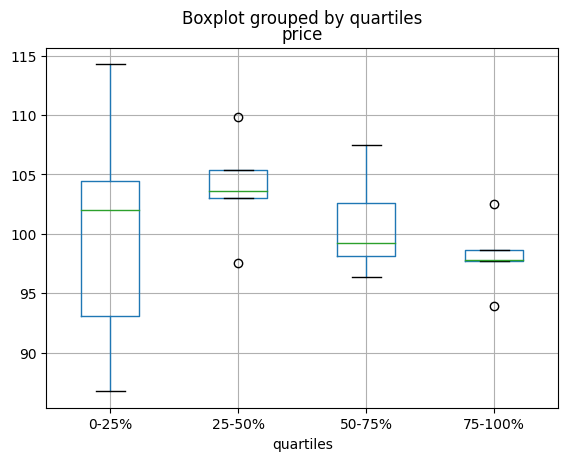

In [ ]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)

df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)

df.boxplot(column="price", by="quartiles")

## CSV

## Reading multiple files to create a single DataFrame

In [ ]:
for i in range(3):

    data = pd.DataFrame(np.random.randn(10, 4))

    data.to_csv("file_{}.csv".format(i))

files = ["file_0.csv", "file_1.csv", "file_2.csv"]

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [ ]:
import glob

import os

files = glob.glob("file_*.csv")

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

## Parsing date components in multi-columns

In [ ]:
i = pd.date_range("20000101", periods=10000)

df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

df.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [ ]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')

ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)

ds.head()

%timeit pd.to_datetime(ds)

23.4 ms ± 7.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.21 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Skip row between header and data

In [ ]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

In [ ]:
from io import StringIO

pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [ ]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [ ]:
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

pd.read_csv(

    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns

)


,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


## HDFStore

In [ ]:
df = pd.DataFrame(np.random.randn(8, 3))

store = pd.HDFStore("test.h5")

store.put("df", df)

store.get_storer("df").attrs.my_attribute = {"A": 10}

store.get_storer("df").attrs.my_attribute

{'A': 10}

In [ ]:
store = pd.HDFStore("test.h6", "w", driver="H5FD_CORE")

df = pd.DataFrame(np.random.randn(8, 3))

store["test"] = df

store.close()

## Correlation

In [ ]:
df = pd.DataFrame(np.random.random(size=(100, 5)))

corr_mat = df.corr()

mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)

corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.075882,NaN,NaN,NaN,NaN
2,-0.092427,0.224314,NaN,NaN,NaN
3,-0.065013,-0.070038,0.089537,NaN,NaN
4,-0.066915,-0.008020,-0.112113,-0.127881,NaN


In [ ]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))

    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])

    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)

    return cov_ab / std_a / std_b

df = pd.DataFrame(np.random.normal(size=(100, 3)))

df.corr(method=distcorr)

,0,1,2
0,1.000000,0.169235,0.165869
1,0.169235,1.000000,0.125506
2,0.165869,0.125506,1.000000


## Timedeltas

In [ ]:
import datetime

s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))

s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [ ]:
s.max() - s

0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [ ]:
s - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [ ]:
s + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [ ]:
datetime.datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [ ]:
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [ ]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])

df = pd.DataFrame({"A": s, "B": deltas})

df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [ ]:
df["New Dates"] = df["A"] + df["B"]

df["Delta"] = df["A"] - df["New Dates"]

df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [ ]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [ ]:
y = s - s.shift()

y

0      NaT
1   1 days
2   1 days
dtype: timedelta64[ns]

In [ ]:
y[1] = np.nan

y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

## Creating example data

In [ ]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())

    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

df = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)

df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


## Constant series

In [ ]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [ ]:
v = s.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [ ]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()